### Norm balls

#### A general norm ellipsoid in $R^{n}$

Is the set generated by a norm ball, for any norm $\lVert  . \rVert$, of radius r, centered at Xc, and transformed by any symmetric matrix $A$ $>$ 0:

- $E$ $=$ $\{x = Xc + Au$ | $\lVert u \rVert$$_{p}$ $<$ 1, $A$ $>$ 0 $\}$

- $A$ $=$ $λ_{1}$ $v_{1}$ $v_{1}\intercal$ $+$ $λ_{2}$ $v_{2}$ $v_{2}\intercal$

In [10]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy as sp
import warnings

warnings.filterwarnings("ignore")

In [20]:
# constant radious
L = 1
# p norms iterations
plist = [0.25, 0.5, 1, 1.5, 2, 3, 8]

In [23]:
## preparing matrix A
v1 = np.array([2,1]); v1 = v1.reshape(2,1)/np.linalg.norm(v1)
v2 = np.array([-1,2]); v2 = v2.reshape(2,1)/np.linalg.norm(v2)
l1= 2; l2= 1
A = l1*np.outer(v1,v1.T) + l2*np.outer(v2,v2.T)

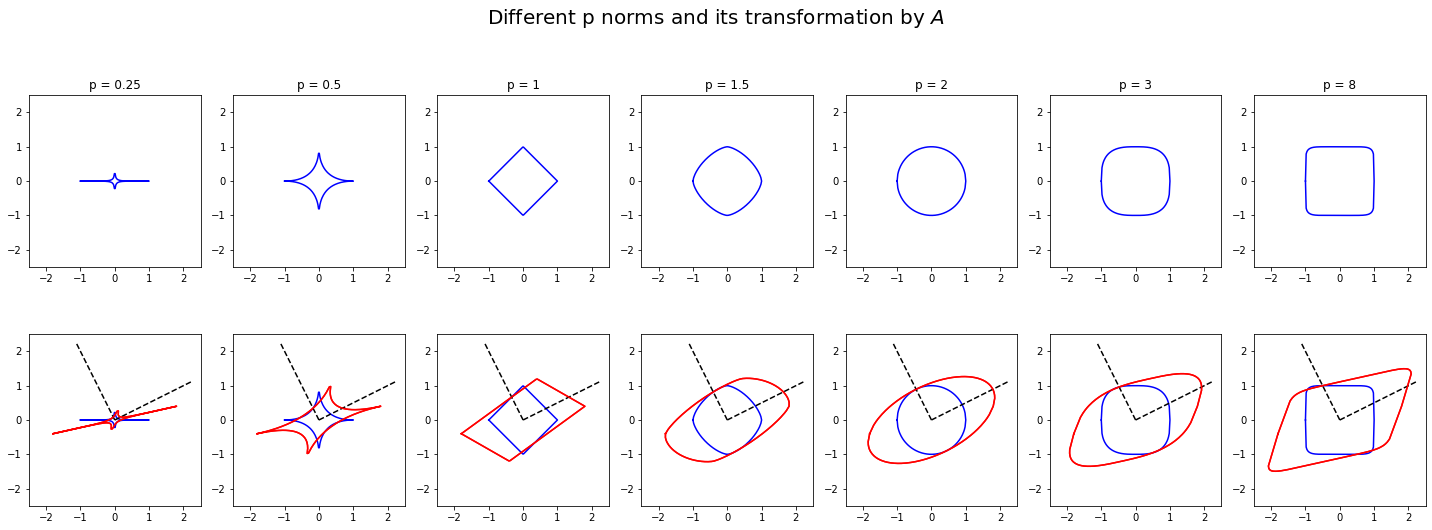

In [28]:
## preparing figures and subplots
fig, axs = plt.subplots(2,len(plist), figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
x = np.linspace(-L,L, 100)

plt.suptitle('Different p norms and its transformation by $A$', fontsize=20)

for j in range(len(plist)):
    p = plist[j]
    y = (L**p-np.abs(x)**p)**(1/p)
    tmp = np.block([ [x, x[::-1]],
                      [y, -y[::-1]]])
    T = tmp
    axs[0,j].plot(T[0,:], T[1,:],'b')
    axs[0,j].set_title('p = '+str(plist[j]))
    axs[1,j].plot(T[0,:], T[1,:],'b')
    T = np.matmul(A, tmp)
    axs[1,j].plot(T[0,:], T[1,:],'r')
    axs[1,j].plot([0,2.5*v1[0]], [0,2.5*v1[1]], '--k', [0,2.5*v2[0]], [0,2.5*v2[1]], '--k')
    axs[1,j].plot(T[0,:], T[1,:],'r')
    for i in range(2):
        axs[i,j].set_aspect(1)
        axs[i,j].set_xlim([-2.5*L,2.5*L])
        axs[i,j].set_ylim([-2.5*L,2.5*L])

plt.tight_layout()
plt.savefig('UnitBall.png')
plt.show()